## ***CAPSTONE PROJECT 3:***
## ***CUSTOMER LIFETIME VALUE (CLV) USING MACHINE LEARNING ALGORITHM***

**by : Giovanni Gunawan Wangidjaja (JCDSOL-021)** 

## 1. Business Problem Understanding

### 1.1 *Context*

Customer Lifetime Value (CLV) adalah metrik yang menghitung total pendapatan yang dapat dihasilkan dari seorang pelanggan selama hubungan bisnis berlangsung. CLV membantu perusahaan menilai nilai jangka panjang pelanggan, memutuskan strategi pemasaran, retensi, pengembangan produk, serta mengelola biaya akuisisi dan pemeliharaan pelanggan.

Mempertahankan pelanggan umumnya lebih murah dan efektif dibanding mencari yang baru. Karena itu, customer retention menjadi kunci menjaga pendapatan stabil dan berkelanjutan—pembelian berulang dari pelanggan lama dapat menjadi sumber pemasukan yang konsisten dan mendorong profitabilitas bisnis.

Selain sebagai indikator keuntungan, CLV juga berfungsi sebagai alat strategis lintas divisi, seperti:

* ***Pemasaran (Marketing)***: Mengarahkan promosi pada pelanggan dengan potensi keuntungan tinggi dan mengidentifikasi segmen bernilai.

* ***Layanan Pelanggan (Customer Service)***: Menyesuaikan metode pelayanan berdasarkan profil pelanggan agar sumber daya digunakan efisien.

* ***Keuangan & Manajemen Risiko (Finance & Risk Management)***: Menghitung kontribusi keuntungan tiap pelanggan dan menentukan langkah jika pelanggan berhenti.

* ***Pengembangan Produk (Product Development)***: Memahami preferensi pelanggan bernilai tinggi untuk meningkatkan loyalitas.

### 1.2 *Problem Statement*

Dataset yang digunakan `data_customer_lifetime_value.csv` berisi informasi pelanggan dari sebuah perusahaan asuransi mobil yang menghadapi tantangan dalam meningkatkan pendapatan. Salah satu penyebabnya adalah strategi pemasaran yang tidak membedakan nilai pelanggan, sehingga anggaran promosi terbuang pada pelanggan bernilai rendah dan berisiko kehilangan pelanggan bernilai tinggi. Perhitungan Customer Lifetime Value (CLV) secara tradisional memerlukan waktu lama karena bergantung pada data riwayat pelanggan, yang membuat penerapan strategi bisnis sering terlambat.

Untuk mengatasi hal ini, diperlukan metode prediksi CLV berbasis machine learning yang cepat dan akurat. Prediksi ini memungkinkan perusahaan mengidentifikasi pelanggan bernilai tinggi lebih awal, memfokuskan anggaran pemasaran secara tepat, meningkatkan efisiensi sumber daya, dan mendukung pengambilan keputusan yang lebih efektif.

### 1.3 *Goals*

Perusahaan asuransi mobil, khususnya divisi pemasaran, sangat diuntungkan jika memiliki alat prediksi Customer Lifetime Value (CLV) berbasis data demografis dan asuransi pelanggan (seperti `'Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education', 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', dan 'Customer Lifetime Value'`). Algoritma machine learning dapat menggantikan proses manual, mempercepat pengambilan keputusan strategis pemasaran dengan manfaat utama:

- **Optimasi Pengeluaran Pemasaran**: Menentukan biaya akuisisi pelanggan agar tetap menguntungkan dan menilai efektivitas kampanye.
- **Strategi Retensi**: Fokus mempertahankan pelanggan agar meningkatkan pendapatan dari pembelian ulang dan loyalitas.
- **Segmentasi Pelanggan**: Mengelompokkan pelanggan berdasarkan nilai untuk penawaran dan perhatian yang tepat.
- **Perencanaan Anggaran**: Mengalokasikan sumber daya secara efisien ke pelanggan dengan nilai CLV tinggi.
- **Pengembangan Produk**: Menyesuaikan produk dan layanan agar sesuai kebutuhan pelanggan bernilai tinggi, meningkatkan kepuasan dan durasi hubungan.

### 1.4 *Analytic Approach*

Langkah yang akan ditempuh meliputi analisis data untuk mengidentifikasi pola pada berbagai fitur yang memengaruhi perbedaan nilai Customer Lifetime Value (CLV) antar pelanggan. Model regresi berbasis algoritma machine learning akan digunakan untuk membangun sistem prediksi CLV yang akurat. Secara rinci, tahapan yang dilakukan adalah sebagai berikut:

- Melaksanakan Explanatory Data Analysis (*EDA*) guna memahami karakteristik dan distribusi data.
- Melakukan Feature Engineering jika diperlukan untuk meningkatkan kualitas variabel prediktor.
- Melaksanakan Preprocessing agar data siap digunakan dalam pemodelan.
- Melakukan Benchmarking terhadap beberapa model regresi untuk menentukan model yang paling sesuai.
- Melaksanakan Hyperparameter Tuning pada model terpilih guna menurunkan tingkat kesalahan prediksi.

### 1.5 *Metric Evaluation*

Metrik evaluasi yang digunakan adalah RMSE, MAE, dan MAPE:

1. `RMSE (Root Mean Square Error)`: Mengukur akar rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual.
2. `MAE (Mean Absolute Error)`: Mengukur rata-rata nilai absolut selisih antara nilai prediksi dan nilai aktual.
3. `MAPE (Mean Absolute Percentage Error)`: Mengukur rata-rata persentase absolut kesalahan relatif terhadap nilai aktual.

MAE dan MAPE dipilih karena mudah diinterpretasikan; MAE menunjukkan rata-rata deviasi prediksi dari nilai aktual, sedangkan MAPE menormalkan error tersebut terhadap nilai aktual, sehingga bermanfaat saat nilai CLV yang besar memiliki error tinggi namun persentasenya terhadap keseluruhan data rendah.

$$RMSE =   \sqrt{ \frac{ \sum\nolimits_{i=1}^{n} ( Y_i - \widehat{Y_i})^2 }{n} } $$
$$MAE =  \frac{\sum\nolimits_{i=1}^{n} |Y_i - \widehat{Y_i}|}{n}$$
$$MAPE =  \frac{1}{n}   \sum_{i=1}^{n} | \frac{Y_i - \widehat{Y_i}}{Y_i}|$$
$n$ = Jumlah data<br>
$i$ = variabel i<br>
$Y_i$ = Data aktual<br>
$\widehat{Y_i}$ = Data Prediksi

Semakin kecil nilai RMSE, MAE, dan MAPE, semakin tinggi akurasi model dalam memprediksi CLV sesuai batasan fitur yang digunakan.

## 2. Data Understanding


In [141]:
# Import Library

import pandas as pd
import numpy as np   

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import kruskal

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pendukung Algoritma Machine Learning (ML)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluasi
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore", category=FutureWarning)

In [142]:
# Import Dataset Customer Lifetime Value
CLV = pd.read_csv("data_customer_lifetime_value.csv")
CLV.rename({"EmploymentStatus" : "Employment Status"}, axis = 1, inplace = True) # Memperbaiki nama feature
display(CLV.head(), CLV.tail())

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


Dataset `'data_customer_lifetime_value.csv'` berisi rangkuman data customer asuransi mobil di suatu perusahaan. Terdapat 11 kolom dengan rincian sebagai berikut:

| **Nama Kolom** | **Tipe Data** | **Deskripsi** |
| --- | --- | --- |
| `Vehicle Class` | *Object* | `Kategori atau jenis kendaraan` yang dimiliki oleh pelanggan (misalnya, "*Four-Door Car*", "*Two-Door Car*").|
| `Coverage` | *Object* | `Tingkat atau jenis perlindungan asuransi` yang dimiliki oleh pelanggan (misalnya, "*Extended*", "*Basic*", "*Premium*").|
| `Renew Type Offer` | *Object* | `Jenis penawaran pembaruan` yang diberikan kepada pelanggan (misalnya, "*Offer1*", "*Offer3*").|
| `EmploymentStatus` | *Object* | `Status pekerjaan` pelanggan (misalnya, "*Retired*", "*Employed*", "*Disabled*", "*Medical Leave*").|
| `Marital Status` | *Object* | `Status pernikahan` pelanggan (misalnya, "*Divorced*", "*Married*").|
| `Education` | *Object* | `Tingkat pendidikan` yang telah dicapai oleh pelanggan (misalnya, "*High School or Below*", "*College*", "*Master*").|
| `Number of Policies` | *Float* | `Jumlah polis asuransi` yang dimiliki oleh pelanggan.|
| `Monthly Premium Auto` | *Float* | `Jumlah premi bulanan` yang dibayar oleh pelanggan untuk asuransi kendaraan mereka.|
| `Total Claim Amount` | *Float* | `Jumlah total klaim yang diajukan` oleh pelanggan.|
| `Income` | *Float* | `Pendapatan pelanggan` (dalam satuan moneter).|
| `Customer Lifetime Value` | *Float* | `Nilai seumur hidup` pelanggan, yang merupakan perkiraan total pendapatan yang dapat dihasilkan dari pelanggan ini sepanjang hubungan mereka dengan perusahaan.|

In [143]:
# Memisahkan feature kategorikal dan numerikal
ctgk = ["Vehicle Class", "Coverage", "Renew Offer Type", "Employment Status", "Marital Status", "Education"]
nmrk = ["Number of Policies", "Monthly Premium Auto", "Total Claim Amount", "Income", "Customer Lifetime Value"]

In [144]:
# Eksplorasi awal data sebelum analisis
print('Jumlah dimensi: ', CLV.ndim)
print('Bentuk data: ', CLV.shape)
print(f'Jumlah baris: {CLV.shape[0]}')
print(f'Jumlah kolom: {CLV.shape[1]}')
print('Index yang dimiliki: ', CLV.index)
print('Kolom yang dimiliki: ', CLV.columns)

Jumlah dimensi:  2
Bentuk data:  (5669, 11)
Jumlah baris: 5669
Jumlah kolom: 11
Index yang dimiliki:  RangeIndex(start=0, stop=5669, step=1)
Kolom yang dimiliki:  Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')


In [145]:
CLV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   Employment Status        5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [146]:
CLV.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

### 2.1 *Cleaining Data*

Kita akan memeriksa dataset `data_customer_lifetime_value.csv` untuk mengidentifikasi adanya data yang kosong (*missing values*) maupun data yang terduplikasi (*duplicates*).

In [147]:
# Melihat apakah ada missing value pada data set
CLV.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
Employment Status          0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [148]:
# Melihat apakah data yang menggunakan simbol atau tanda sebagai missing value
feature = []
n_data = []
n_feature = []
s_feature = []

for i in CLV.columns:
    feature.append(i)
    n_data.append(CLV[i].count())
    n_feature.append(CLV[i].nunique())
    s_feature.append(list(CLV[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Datas" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = CLV.columns)

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,5669,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,5669,3,"[Extended, Basic, Premium]"
Renew Offer Type,5669,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,5669,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,5669,3,"[Divorced, Married, Single]"
Education,5669,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,5669,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,5669,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,5669,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,5669,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


Hasil pemeriksaan menunjukkan bahwa dataset tidak memiliki data kosong (*missing values*).

In [149]:
# Mecari data duplicate dari dataset Customer Lifetime Value
CLV.duplicated(keep = "first").sum() # parameter keep digunakan untuk mematiskan satu data duplicate terhitung tidak duplicate

618

In [150]:
# Mecari data duplicate dari dataset Customer Lifetime Value berdasarkan kolom Customer Lifetime Value
CLV.duplicated(subset = "Customer Lifetime Value", keep = "first").sum()

620

Perusahaan asuransi mobil—khususnya divisi pemasaran—akan sangat terbantu jika memiliki alat yang dapat memprediksi Customer Lifetime Value (CLV) dengan memanfaatkan data demografis dan data asuransi pelanggan, seperti yang terdapat pada kolom dataset (`Vehicle Class`, `Coverage`, `Renew Offer Type`, `EmploymentStatus`, `Marital Status`, `Education`, `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`). Dengan dukungan algoritma machine learning, pengolahan CLV tidak perlu lagi dilakukan secara manual, sehingga proses pengambilan keputusan dalam strategi pemasaran dapat dilakukan lebih cepat dan tepat sasaran.

Terdapat 618 data duplikat pada dataset CLV, yang kemungkinan muncul akibat kesalahan saat proses input. Hal ini diperkuat oleh temuan bahwa jumlah duplikat berdasarkan kolom Customer Lifetime Value mencapai 620 baris. Mengingat nilai Customer Lifetime Value seharusnya unik untuk setiap pelanggan, data duplikat tersebut perlu dihapus terlebih dahulu.

In [151]:
# Drop data duplkicate
CLV = CLV[CLV.duplicated(keep = "first") == False] 

In [152]:
pd.DataFrame({
    'kolom': CLV.columns.values,
    'data_type': CLV.dtypes.values,
    'null_value(%)': CLV.isna().mean().values * 100,
    'negative_value(%)': [len(CLV[col][CLV[col] < 0]) / len(CLV) * 100 if col in CLV.select_dtypes(include=[np.number]).columns else 0 for col in CLV.columns],
    '0_value(%)': [len(CLV[col][CLV[col] == 0]) / len(CLV) * 100 if col in CLV.select_dtypes(include=[np.number]).columns else 0 for col in CLV.columns],
    'duplicate' : CLV.duplicated().sum(),
    'n_unique': CLV.nunique().values,
    'sample_unique': [CLV[col].unique() for col in CLV.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,Vehicle Class,object,0.0,0.0,0.000,0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,object,0.0,0.0,0.000,0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0.0,0.0,0.000,0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,Employment Status,object,0.0,0.0,0.000,0,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,object,0.0,0.0,0.000,0,3,"[Divorced, Married, Single]"
5,Education,object,0.0,0.0,0.000,0,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,float64,0.0,0.0,0.000,0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0.0,0.0,0.000,0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,float64,0.0,0.0,0.000,0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,float64,0.0,0.0,26.371,0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


Setelah dilakukan proses pembersihan data, dataset kini sepenuhnya bebas dari *missing value* maupun entri *duplikat*, sehingga siap digunakan untuk analisis lebih lanjut.

### *2.2 Statistik Kolom Numeral dan Kategori*

In [153]:
display(CLV.describe(), CLV.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


### 2.3 *Outlier*

In [154]:
# Jumlah outlier dan persentasenya pada tiap kolom numerikal
kolom_numerikal = CLV.describe().columns
tabel_outlier = pd.DataFrame(columns = ['Median' , 'Batas Bawah' , 'Batas Atas' , 'Jumlah Outlier' , 'Persentase Outlier (%)'])
for kolom in kolom_numerikal:
    Q1 = CLV[kolom].quantile(0.25)
    Q2 = CLV[kolom].quantile(0.5)
    Q3 = CLV[kolom].quantile(0.75)
    batas_atas = Q3 + 1.5 * (Q3 - Q1)
    batas_bawah = Q1 - 1.5 * (Q3 - Q1)
    tabel_outlier.loc[kolom] = [CLV[kolom].median(), batas_bawah, batas_atas, len(CLV[(CLV[kolom]>batas_atas) | (CLV[kolom]<batas_bawah)]), len(CLV[(CLV[kolom]>batas_atas) | (CLV[kolom]<batas_bawah)]) / len(CLV) * 100]
display(tabel_outlier.round(2))

,Median,Batas Bawah,Batas Atas,Jumlah Outlier,Persentase Outlier (%)
Number of Policies,2.00,-3.50,8.50,228.0,4.51
Monthly Premium Auto,82.00,6.50,170.50,252.0,4.99
Total Claim Amount,374.40,-192.74,992.64,217.0,4.30
Income,34322.00,-93707.25,156178.75,0.0,0.00
Customer Lifetime Value,5837.53,-3631.74,16624.75,449.0,8.89


## 3. Explanitory Data Analysis (EDA)

### 3.1 *Distribusi Kolom Kategorikal*

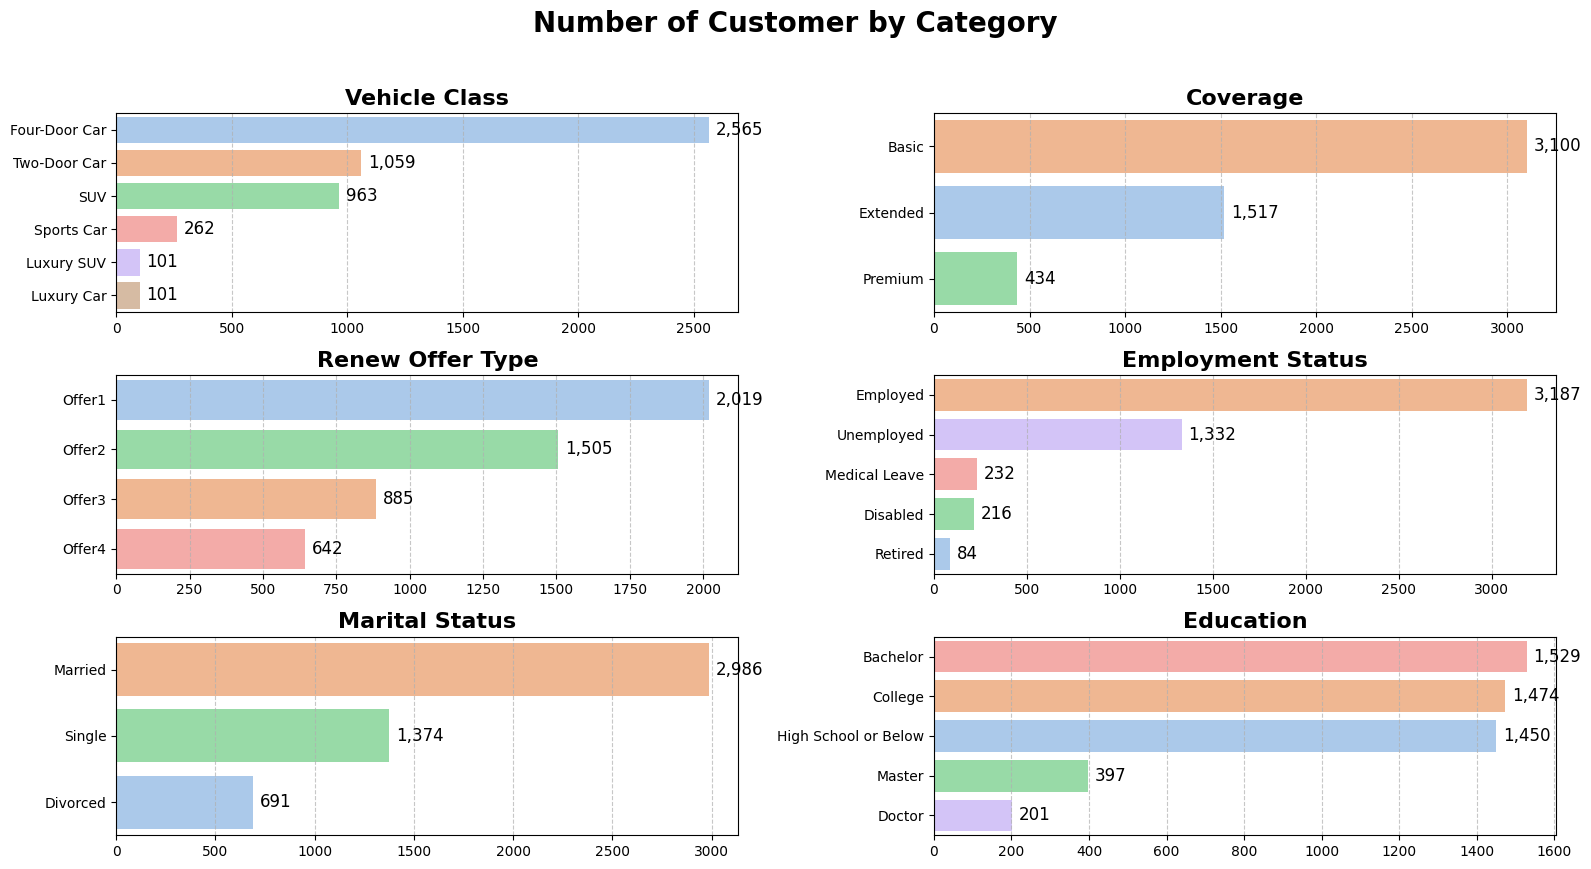

In [155]:
categorical_cols = list(CLV.describe(include = 'O').columns)

plt.figure(figsize = (16, 8))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3, 2, num_subplot)
    sns.countplot(data = CLV, y = i, order = CLV[i].value_counts().index, hue = i, legend = False, palette = 'pastel')
    
    # Menambahkan anotasi
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_width():,.0f}', 
                           (p.get_width(), p.get_y() + p.get_height() / 2), 
                           ha = 'left', va = 'center', fontsize = 12, color = 'black', xytext = (5, 0),
                           textcoords = 'offset points')
    
    plt.title(i, fontsize = 16, weight = 'bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
    plt.tight_layout()
    num_subplot += 1

plt.suptitle('Number of Customer by Category', fontsize = 20, weight = 'bold', y = 1.08)
plt.show()

- `Tipe Kendaraan` – Mayoritas pelanggan menggunakan mobil dengan 4 pintu, berjumlah 2.565 orang, hampir dua kali lipat dibandingkan tipe kendaraan lainnya. Hal ini kemungkinan besar karena mobil 4 pintu lebih umum dipasarkan. Sementara itu, mobil 2 pintu dan SUV berada di posisi berikutnya dengan jumlah masing-masing 1.059 dan 963 pelanggan. Jenis mobil mewah dan sport hanya dimiliki sedikit pelanggan, mungkin karena ketersediaannya yang terbatas di pasaran.
- `Jenis Coverage` – Sebagian besar pelanggan memilih paket coverage basic (3.100 orang), disusul oleh extended dan premium. Kecenderungan ini mungkin dipengaruhi oleh dominasi pengguna mobil standar (4 pintu, 2 pintu, dan SUV) yang cenderung memilih opsi perlindungan dengan biaya lebih rendah.
- `Penawaran Pembaruan` – Penawaran pembaruan ke-1 menjadi yang paling banyak diterima, yaitu 2.019 pelanggan. Selanjutnya diikuti oleh penawaran ke-2 (1.505 pelanggan), ke-3 (885 pelanggan), dan ke-4 (642 pelanggan).
- `Status Pekerjaan` – Mayoritas pelanggan adalah pekerja aktif, mencapai 3.187 orang. Kondisi ini wajar karena mereka memiliki pendapatan untuk membeli dan memelihara kendaraan.
- `Status Pernikahan` – Sebagian besar pelanggan berstatus menikah, berjumlah 2.986 orang.
- `Tingkat Pendidikan` – Pelanggan dengan tingkat pendidikan Bachelor, College, dan High School or Below memiliki jumlah yang hampir sama, sekitar 1.500-an orang. Sementara itu, pemegang gelar Master dan Doctor lebih sedikit, kemungkinan karena secara umum jumlah lulusan di tingkat tersebut memang terbatas.

### 3.2 *Distribusi Kolom Customer Lifetime Value*

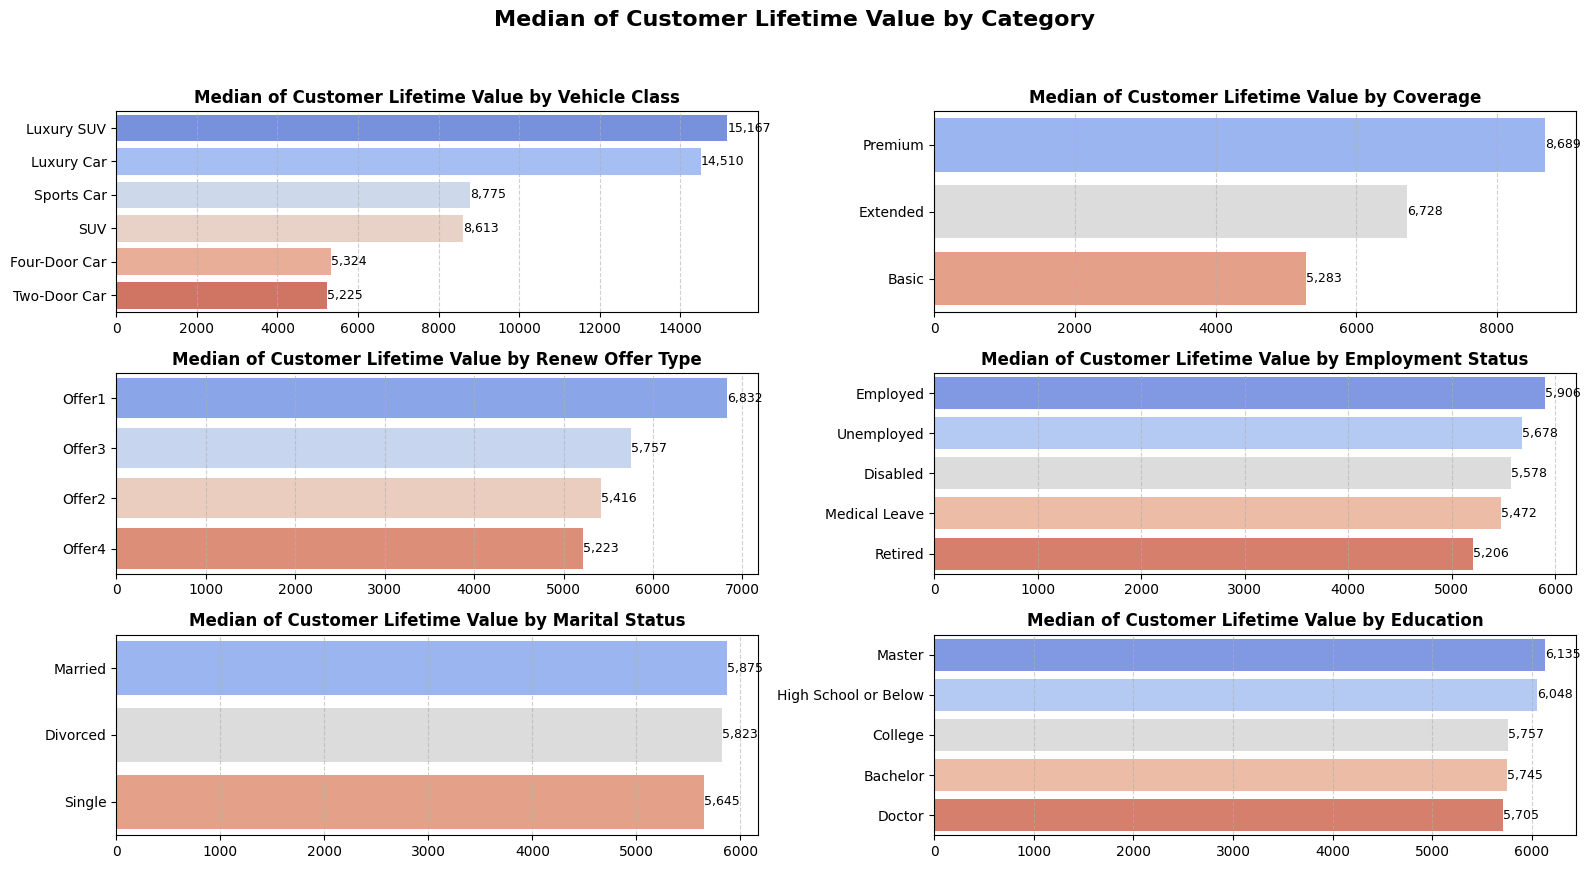

In [156]:
categorical_cols = list(CLV.describe(include='O').columns)

plt.figure(figsize=(16, 8))
num_subplot = 1

for col in categorical_cols:
    plt.subplot(3, 2, num_subplot)
    
    median_values = CLV.groupby(col)['Customer Lifetime Value'].median().sort_values(ascending=False)
    CLV_med = median_values.reset_index().rename(columns={'Customer Lifetime Value':'Median CLV'})

    # Gunakan hue = col dan legend=False untuk menghindari peringatan Seaborn
    sns.barplot(data=CLV_med, x='Median CLV', y=col, hue=col, dodge=False,
                palette='coolwarm', legend=False, ci=None)
    
    # Anotasi (dibulatkan tanpa desimal)
    for i, val in enumerate(CLV_med['Median CLV']):
        plt.text(val, i, f'{round(val):,}', va='center', ha='left', fontsize=9)

    plt.title(f'Median of Customer Lifetime Value by {col}', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    num_subplot += 1

plt.suptitle('Median of Customer Lifetime Value by Category', fontsize=16, weight='bold', y=1.08)
plt.show()

* Tipe kendaraan mewah seperti luxury cars dan luxury SUV memiliki median Customer Lifetime Value (CLV) tertinggi, yaitu sekitar 14.000-an. Posisi berikutnya ditempati oleh SUV dan sports cars dengan median CLV sekitar 8.000-an. Sementara itu, mobil empat pintu dan dua pintu memiliki median CLV yang sama, yakni sekitar 5.000-an.

In [157]:
CLV.groupby("Vehicle Class")[["Monthly Premium Auto", "Customer Lifetime Value"]] \
   .median() \
   .sort_values("Customer Lifetime Value") \
   .style.set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }]) \
   .format({
       "Monthly Premium Auto": "{:.1f}",       
       "Customer Lifetime Value": "{:.5f}"    
   })

,Monthly Premium Auto,Customer Lifetime Value
Vehicle Class,,
Two-Door Car,71.0,5225.03143
Four-Door Car,72.0,5324.38786
SUV,116.0,8613.46400
Sports Car,116.0,8774.73829
Luxury Car,193.0,14510.44376
Luxury SUV,199.0,15167.04402


* Basic coverage memiliki median CLV sebesar 5.282,94, lebih rendah dibandingkan tipe premium dan extended yang masing-masing memiliki median sebesar 8.688,81 dan 6.727,62. Perbedaan ini kemungkinan disebabkan oleh variasi premi yang dibayarkan pada setiap jenis coverage, di mana basic coverage memiliki premi terendah dan premium coverage memiliki premi tertinggi.

In [158]:
CLV.groupby("Coverage")[["Monthly Premium Auto", "Customer Lifetime Value"]] \
   .median() \
   .sort_values("Customer Lifetime Value") \
   .style.set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }]) \
   .format({
       "Monthly Premium Auto": "{:.1f}",       
       "Customer Lifetime Value": "{:.5f}"    
   })

,Monthly Premium Auto,Customer Lifetime Value
Coverage,,
Basic,70.0,5282.93724
Extended,92.0,6727.61700
Premium,114.0,8688.81300


* Jenis penawaran pembaharuan menunjukkan variasi median nilai CLV yang cukup signifikan, meskipun Offer 1 menonjol dengan median CLV yang lebih tinggi dibandingkan jenis lainnya. Hal ini kemungkinan disebabkan oleh pelanggan yang memilih Offer 1 cenderung memiliki premi bulanan median yang lebih besar daripada pelanggan pada penawaran lainnya.

In [159]:
CLV.groupby("Renew Offer Type")[["Monthly Premium Auto", "Customer Lifetime Value"]]\
   .median() \
   .sort_values("Customer Lifetime Value") \
   .style.set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }]) \
   .format({
       "Monthly Premium Auto": "{:.1f}",       
       "Customer Lifetime Value": "{:.5f}"
   })

,Monthly Premium Auto,Customer Lifetime Value
Renew Offer Type,,
Offer4,74.0,5222.65620
Offer2,78.0,5416.41358
Offer3,79.0,5757.48940
Offer1,90.0,6832.11197


* Nilai rata-rata premi bulanan hampir sama di semua status pekerjaan sekitar 5.000-an, sementara Customer Lifetime Value sedikit lebih tinggi pada pelanggan yang bekerja. Perbedaan CLV antar status pekerjaan relatif kecil, menunjukkan status pekerjaan tidak berpengaruh signifikan.

In [160]:
CLV.groupby("Employment Status")[["Monthly Premium Auto", "Customer Lifetime Value"]] \
   .median() \
   .sort_values("Customer Lifetime Value") \
   .style.set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }]) \
   .format({
       "Monthly Premium Auto": "{:.1f}",       
       "Customer Lifetime Value": "{:.5f}"    
   })

,Monthly Premium Auto,Customer Lifetime Value
Employment Status,,
Retired,84.5,5205.88219
Medical Leave,81.0,5472.15698
Disabled,85.5,5577.56963
Unemployed,83.0,5677.67998
Employed,81.0,5905.97167


* Rata-rata premi bulanan cukup seragam di semua status pernikahan sekitar 5.700-an, dengan nilai CLV tertinggi pada pelanggan yang menikah dan terendah pada yang lajang. Namun, perbedaan CLV antar status pernikahan relatif kecil.

In [161]:
CLV.groupby("Marital Status")[["Monthly Premium Auto", "Customer Lifetime Value"]] \
   .median() \
   .sort_values("Customer Lifetime Value") \
   .style.set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }]) \
   .format({
       "Monthly Premium Auto": "{:.1f}",       
       "Customer Lifetime Value": "{:.5f}"    
   })

,Monthly Premium Auto,Customer Lifetime Value
Marital Status,,
Single,83.0,5645.39935
Divorced,80.0,5823.16292
Married,81.0,5875.43726


* Rata-rata premi bulanan bervariasi sedikit berdasarkan tingkat pendidikan sekitar 5.700-an, dengan nilai tertinggi pada kategori Master dan High School or Below. Customer Lifetime Value juga menunjukkan peningkatan kecil, paling tinggi pada kategori Master dan terendah pada Doctor, namun perbedaan antar tingkat pendidikan relatif kecil.

In [162]:
CLV.groupby("Education")[["Monthly Premium Auto", "Customer Lifetime Value"]] \
   .median() \
   .sort_values("Customer Lifetime Value") \
   .style.set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }]) \
   .format({
       "Monthly Premium Auto": "{:.1f}",       
       "Customer Lifetime Value": "{:.5f}"    
   })

,Monthly Premium Auto,Customer Lifetime Value
Education,,
Doctor,78.0,5704.97714
Bachelor,80.0,5745.12155
College,82.0,5756.51438
High School or Below,84.0,6047.82874
Master,84.0,6135.08384


* Perbedaan nilai CLV antar kelompok relatif kecil. Berdasarkan hasil uji Kruskal-Wallis, didapatkan p-value sebesar 0,0002821 untuk `Employment Status`, 0,09668 untuk `Marital `Status, dan 0,09115 untuk `Education`. Hal ini menunjukkan bahwa meskipun ada perbedaan statistik untuk `Employment Status`, `Marital Status`, dan `Education`, ketiga fitur tersebut kemungkinan tidak berpengaruh signifikan terhadap model.

In [163]:
stat, p = kruskal(
    CLV[CLV["Employment Status"] == "Employed"]["Customer Lifetime Value"],
    CLV[CLV["Employment Status"] == "Unemployed"]["Customer Lifetime Value"],
    CLV[CLV["Employment Status"] == "Disabled"]["Customer Lifetime Value"],
    CLV[CLV["Employment Status"] == "Retired"]["Customer Lifetime Value"],
    CLV[CLV["Employment Status"] == "Medical Leave"]["Customer Lifetime Value"]
)

print(f"Kruskal-Wallis (by Employment Status): H = {stat:.4f}, p = {p:.4g}")

stat, p = kruskal(
    CLV[CLV["Marital Status"] == "Divorced"]["Customer Lifetime Value"],
    CLV[CLV["Marital Status"] == "Married"]["Customer Lifetime Value"],
    CLV[CLV["Marital Status"] == "Single"]["Customer Lifetime Value"])

print(f"Kruskal-Wallis (by Marital Status): H = {stat:.4f}, p = {p:.4g}")

stat, p =kruskal(
    CLV[CLV["Education"] == "High School or Below"]["Customer Lifetime Value"],
    CLV[CLV["Education"] == "College"]["Customer Lifetime Value"],
    CLV[CLV["Education"] == "Master"]["Customer Lifetime Value"],
    CLV[CLV["Education"] == "Bachelor"]["Customer Lifetime Value"],
    CLV[CLV["Education"] == "Doctor"]["Customer Lifetime Value"])

print(f"Kruskal-Wallis (by Education): H = {stat:.4f}, p = {p:.4g}")

Kruskal-Wallis (by Employment Status): H = 21.2530, p = 0.0002821
Kruskal-Wallis (by Marital Status): H = 4.6726, p = 0.09668
Kruskal-Wallis (by Education): H = 8.0116, p = 0.09115


### 3.3 *Distribusi Kolom Numeral*

In [164]:
CLV[nmrk].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


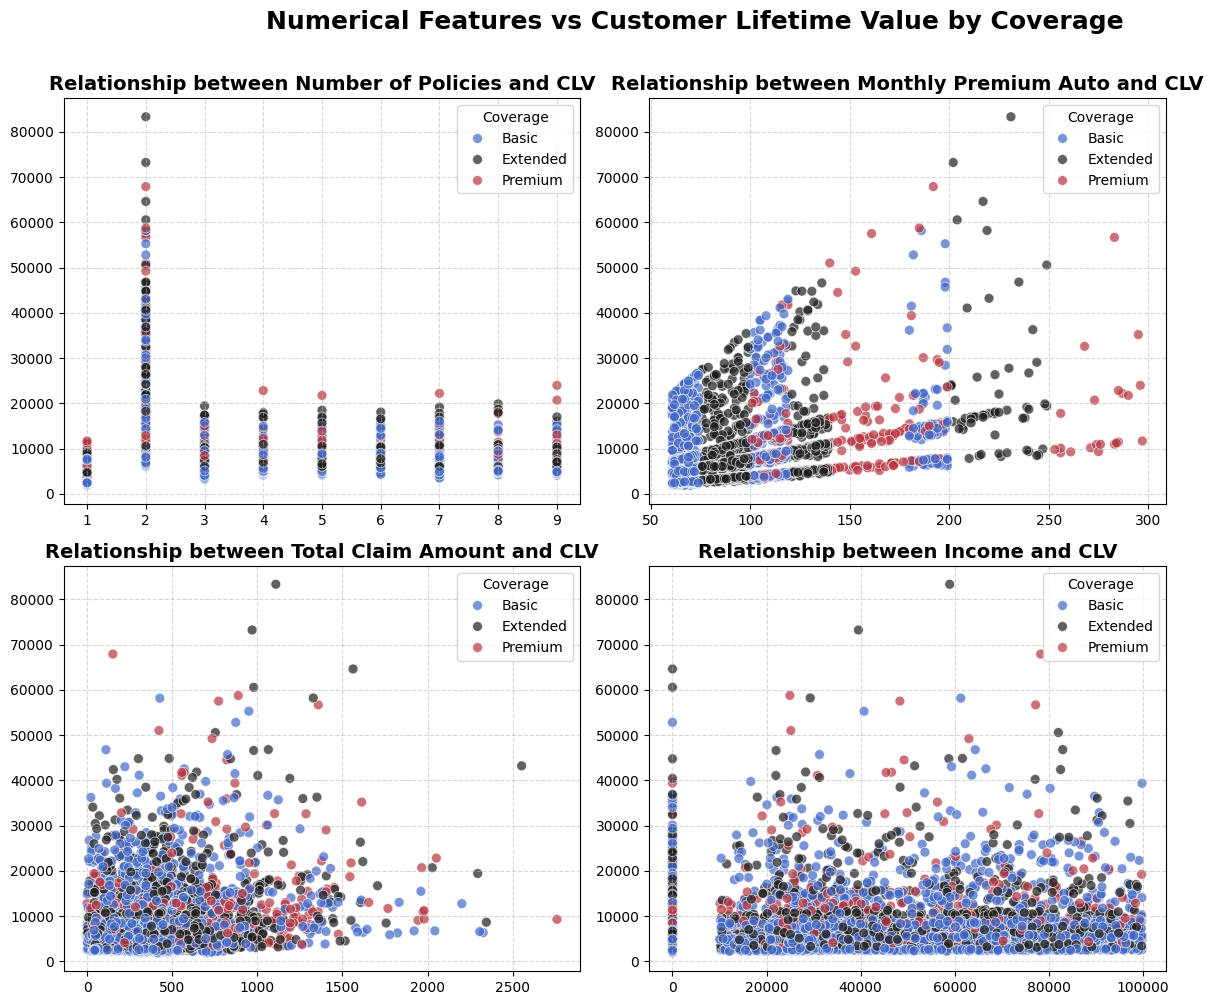

In [165]:
numerical = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=False)
axes = axes.flatten()

for idx, feature in enumerate(numerical):
    sns.scatterplot(
        data=CLV, x=feature, y='Customer Lifetime Value', 
        hue='Coverage', hue_order=['Basic', 'Extended', 'Premium'], 
        palette='icefire', s=50, alpha=0.7, ax=axes[idx]
    )
    axes[idx].set_title(f'Relationship between {feature} and CLV', fontsize=14, weight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].grid(True, linestyle='--', alpha=0.5)

# Atur layout agar tidak overlap
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

plt.suptitle('Numerical Features vs Customer Lifetime Value by Coverage', fontsize=18, weight='bold', y=1.00)
plt.show()

1. Number of Policies vs CLV:
  - Terdapat kecenderungan nilai Customer Lifetime Value meningkat seiring dengan bertambahnya jumlah polis yang dimiliki pelanggan.
  - Pelanggan dengan kategori Premium cenderung memiliki nilai CLV lebih tinggi dibandingkan Basic dan Extended, terutama pada jumlah polis yang lebih besar.
2. Monthly Premium Auto vs CLV:
  - Terlihat hubungan positif: semakin tinggi premi bulanan, semakin besar nilai CLV.
  - Kategori Premium umumnya memiliki premi bulanan dan CLV yang lebih tinggi dibanding kategori lainnya.
3. Total Claim Amount vs CLV:
  - Hubungan antara total klaim dengan CLV agak tersebar, namun pelanggan dengan klaim yang lebih tinggi cenderung memiliki nilai CLV yang lebih besar.
  - Perbedaan warna menunjukkan pelanggan Premium dan Extended cenderung memiliki nilai klaim dan CLV yang lebih tinggi.
4. Income vs CLV:
  - Meskipun data agak tersebar, ada pola bahwa pelanggan dengan penghasilan lebih tinggi cenderung memiliki CLV yang lebih besar.
  - Pelanggan pada kategori Premium masih mendominasi kelompok dengan CLV dan pendapatan tinggi.

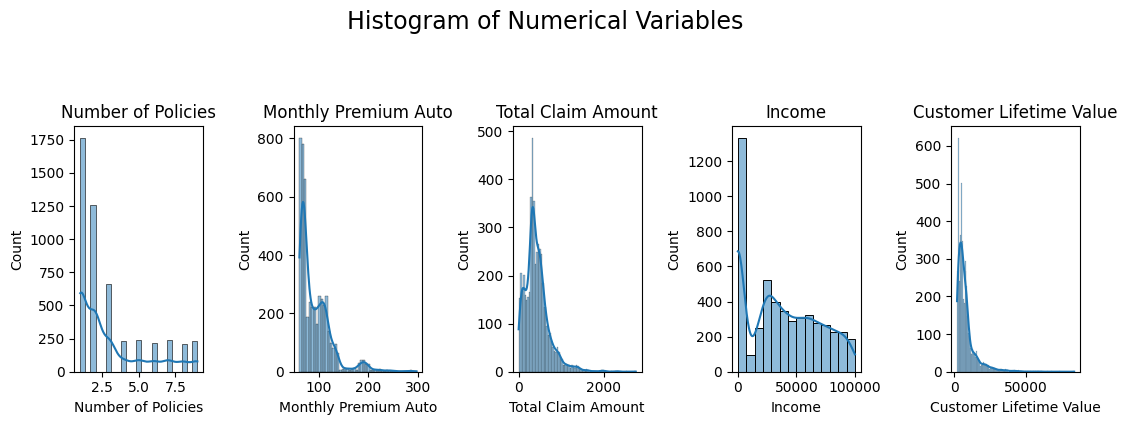

In [166]:
fig, axs = plt.subplots(1, 5, figsize=(11, 4), facecolor="white")

fig.suptitle("Histogram of Numerical Variables", size=17, y=1.05)

for pos, i in enumerate(CLV[nmrk].columns):
    sns.histplot(CLV[i], ax=axs[pos], kde=True)
    axs[pos].set_title(i)
    axs[pos].set_facecolor("white")

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

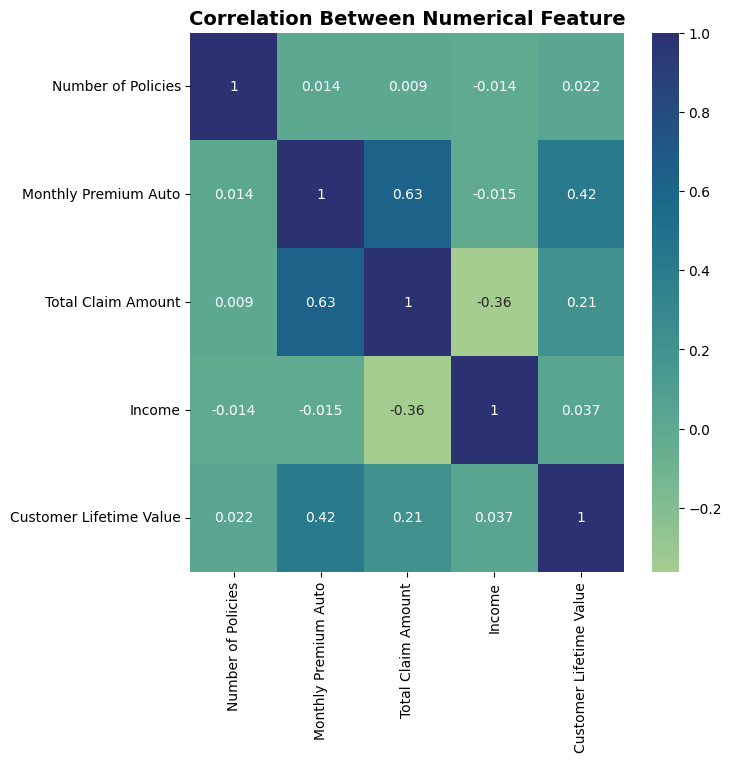

In [167]:
plt.figure(figsize=(7, 7), facecolor = "white")
sns.heatmap(CLV[nmrk].corr(), annot = True, cmap = "crest")

plt.title("Correlation Between Numerical Feature", weight='bold', size = 14)
plt.show()

Variabel numerik dalam dataset kemungkinan besar tidak terdistribusi normal, yang dapat dilihat dari skewness pada histogram atau kurva KDE yang tidak simetris. Selain itu, terdapat nilai ekstrim yang menunjukkan adanya pencilan (outlier). Informasi ini penting untuk menentukan teknik analisis atau pra-pemrosesan data yang sesuai, seperti transformasi data atau penanganan outlier sebelum membangun model prediksi.

Di sisi lain, heatmap korelasi menunjukkan bahwa variabel dengan korelasi tinggi positif atau negatif memiliki hubungan erat dan bisa saling menjadi indikator, sedangkan variabel dengan korelasi rendah atau mendekati nol cenderung independen secara linier. Pemahaman korelasi ini membantu dalam memilih fitur yang tepat untuk model prediksi dan menghindari masalah multikolinearitas, sekaligus memberikan wawasan tentang hubungan antar fitur dalam dataset.

### 3.4 *Monthly Premium Auto (By Vehicle Class)*

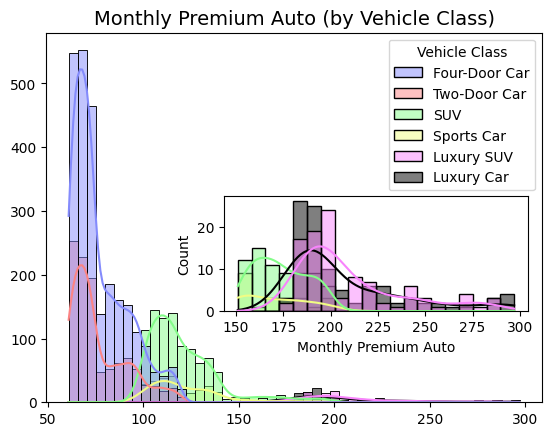

In [168]:
# Mothly Premium Auto
fig, ax1 = plt.subplots(facecolor = "white")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = CLV, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = True, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = CLV[CLV["Monthly Premium Auto"] > 150], bins = 20, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = True, palette = ["#F884FC", "black", "#84FC89", "#F1FC84"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Monthly Premium Auto (by Vehicle Class)", size = 14)

ax1.set_xlabel('')
ax1.set_ylabel('')

plt.show()

In [169]:
CLV.groupby("Vehicle Class")["Monthly Premium Auto"] \
   .describe() \
   .sort_values("50%") \
   .style \
   .format({
        'count': '{:.0f}',
        'mean': '{:.3f}',
        'std': '{:.3f}',
        '25%': '{:.1f}',
        '50%': '{:.1f}',
        '75%': '{:.1f}',
        'min': '{:.1f}',
        'max': '{:.1f}'
   }) \
   .set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }])

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Two-Door Car,1059,76.674,14.420,61.0,66.0,71.0,86.0,119.0
Four-Door Car,2565,77.021,14.143,61.0,66.0,72.0,86.0,119.0
SUV,963,120.861,18.966,100.0,108.0,116.0,129.0,199.0
Sports Car,262,122.191,19.336,100.0,109.0,116.0,132.0,199.0
Luxury Car,101,207.792,30.933,180.0,187.0,193.0,223.0,297.0
Luxury SUV,101,209.386,27.256,180.0,192.0,199.0,219.0,287.0


- Mayoritas pelanggan membayar premi bulanan (Monthly Premium Auto) di bawah 150, dengan konsentrasi terbanyak sekitar kisaran 60-100, yang terlihat dari histogram utama.
- Pada premi bulanan di atas 150 (ditampilkan di inset kecil), distribusi lebih jarang dan tersebar, menunjukkan bahwa hanya sebagian kecil pelanggan yang membayar premi tinggi.
- Warna-warna yang merepresentasikan Vehicle Class menunjukkan variasi premi antara tipe kendaraan. Misalnya, kategori mobil mewah atau sport (warna tertentu) cenderung mendominasi pada premi tinggi, sedangkan tipe kendaraan lain seperti 4 pintu dan SUV lebih banyak di premi rendah hingga menengah.
- Distribusi premi bulanan bervariasi antar kelas kendaraan, menandakan bahwa tipe kendaraan berpengaruh pada jumlah premi yang dibayarkan pelanggan.
- Informasi ini penting untuk strategi pemasaran yang dapat disesuaikan berdasarkan kelas kendaraan dan rentang premi pelanggan.

In [170]:
def outliers_check(dataset, feature):
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    
    iqr = q3 - q1
    
    global upper_limit, lower_limit
    
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    print(f"Upper Limit for {feature} variable is {upper_limit} and Lower Limit is {lower_limit}")

In [171]:
outliers_check(CLV, "Monthly Premium Auto")

Upper Limit for Monthly Premium Auto variable is 170.5 and Lower Limit is 6.5


Menghapus outlier pada variabel Monthly Premium Auto, dengan batas atas IQR sebesar 170,5 Dollar, dianggap kurang tepat. Jika data dengan nilai Monthly Premium Auto di atas batas tersebut dihilangkan, maka dua kategori dari variabel Vehicle Class, yaitu Luxury Car dan Luxury SUV, akan terhapus. Oleh karena itu, penghapusan outlier berdasarkan variabel Monthly Premium Auto tidak akan dilakukan.

### 3.5 *Total Claim Amount (by Vehicle Class)*

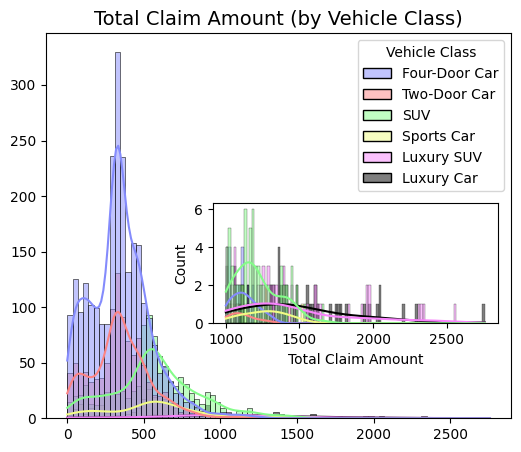

In [172]:
# Total Claim Amount
fig, ax1 = plt.subplots(figsize = (6,5), facecolor = "white")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = CLV, x = "Total Claim Amount", hue = "Vehicle Class", kde = True, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = CLV[CLV["Total Claim Amount"] > 1000], bins = 100, x = "Total Claim Amount", hue = "Vehicle Class", kde = True, palette = ["#84FC89", "#F884FC", "black", "#F1FC84", "#848BFC", "#FC8484"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Total Claim Amount (by Vehicle Class)", size = 14)

ax1.set_xlabel('')
ax1.set_ylabel('')
plt.show()

In [173]:
CLV.groupby("Vehicle Class")["Total Claim Amount"] \
   .describe() \
   .sort_values("50%") \
   .style \
   .format({
        'count': '{:.0f}',
        'mean': '{:.3f}',
        'std': '{:.3f}',
        '25%': '{:.1f}',
        '50%': '{:.1f}',
        '75%': '{:.1f}',
        'min': '{:.1f}',
        'max': '{:.1f}'
   }) \
   .set_properties(**{'text-align': 'center'}) \
   .set_table_styles([{
       'selector': 'th',
       'props': [('text-align', 'center')]
   }])

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565,346.107,198.864,0.4,208.9,336.0,454.4,1310.5
Two-Door Car,1059,347.868,193.767,1.3,230.7,336.0,456.5,1261.9
SUV,963,573.175,289.953,0.5,412.5,556.8,734.4,1654.2
Sports Car,262,550.563,299.233,5.6,343.4,556.8,706.6,1516.4
Luxury SUV,101,1059.876,518.992,1.6,825.7,998.4,1328.8,2552.3
Luxury Car,101,1103.927,518.906,32.9,873.6,1008.6,1396.7,2759.8


- Sebagian besar klaim berada di kisaran nilai rendah hingga menengah, dengan distribusi yang cukup merata di antara sebagian besar kelas kendaraan.
- Namun, terdapat klaim dengan nilai sangat tinggi (lebih dari 1000) yang sebagian besar berasal dari beberapa kelas kendaraan tertentu, terlihat di subplot kecil sebagai outlier.
- Vehicle Class seperti Luxury Car dan Luxury SUV tampak lebih sering memiliki klaim bernilai tinggi dibandingkan kelas kendaraan lain.
- Distribusi ini mengindikasikan bahwa sebagian kecil pelanggan dengan kendaraan mewah berpotensi mengajukan klaim besar, yang perlu diperhatikan dalam pengelolaan risiko dan penentuan premi.
- Grafik juga menunjukkan variasi klaim yang cukup besar antar kelas kendaraan, yang bisa menjadi dasar untuk strategi segmentasi dan penyesuaian produk asuransi.


In [174]:
outliers_check(CLV, "Total Claim Amount")

Upper Limit for Total Claim Amount variable is 992.6433477500001 and Lower Limit is -192.74392225000005


Menghapus data outlier pada variabel Total Claim Amount dengan batas atas sebesar 992,64 Dollar tidak menghilangkan kelas apa pun dalam variabel kategori. Namun, lebih dari separuh data pada kelas Luxury Car dan Luxury SUV, yang masing-masing memiliki median klaim sebesar 998,4 Dollar dan 1008,57 Dollar, akan terhapus. Oleh karena itu, penghapusan outlier pada variabel ini sebaiknya dihindari kecuali jika performa model yang dihasilkan tidak memuaskan.

### 3.6 *Distribusi Customer Life Value (By Policies)*

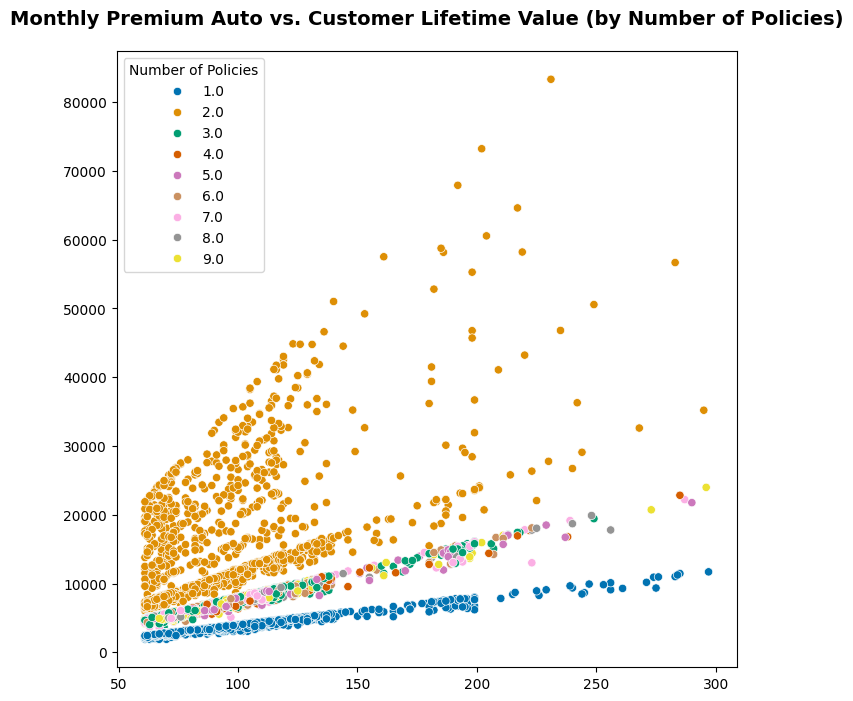

In [175]:
# Customer lifetime Value
plt.figure(figsize = (8,8), facecolor = "white")
sns.scatterplot(data = CLV, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "colorblind")

plt.title("Monthly Premium Auto vs. Customer Lifetime Value (by Number of Policies)", weight='bold', size = 14, y=1.03)
plt.xlabel('') 
plt.ylabel('')
plt.show()

In [176]:
outliers_check(CLV, "Customer Lifetime Value")

Upper Limit for Customer Lifetime Value variable is 16624.75007525 and Lower Limit is -3631.744438749999


Terlihat pola menarik saat membandingkan Customer Lifetime Value dengan Monthly Premium Auto dan Number of Policies. Secara umum, semakin tinggi nilai Monthly Premium Auto, maka Customer Lifetime Value cenderung juga meningkat pada kelompok Number of Policies yang sama. Titik data berwarna biru yang mewakili pelanggan dengan satu polis berada di posisi lebih rendah, sementara pelanggan dengan dua polis menunjukkan nilai Customer Lifetime Value tertinggi dibanding kelompok polis lainnya. Hal ini konsisten dengan temuan sebelumnya yang menunjukkan median CLV tertinggi pada kelompok polis dua. Namun, terdapat sejumlah outlier kontekstual terutama pada kelompok polis dua. Penghapusan outlier ini berpotensi meningkatkan akurasi model prediksi yang akan dikembangkan, mengingat batas atas nilai CLV adalah sekitar 16.625 dan batas bawah sekitar -3.632.

### 3.7 Outliers Removal

In [177]:
outliers_check(CLV, "Customer Lifetime Value")

Upper Limit for Customer Lifetime Value variable is 16624.75007525 and Lower Limit is -3631.744438749999


In [178]:
CLV[CLV["Customer Lifetime Value"] > upper_limit]["Customer Lifetime Value"].count()

449

Terdapat 449 outliers pada kolom Customer Lifetime Value (CLV)

In [179]:
CLV_new = CLV[CLV["Customer Lifetime Value"] <= upper_limit].copy()

In [180]:
feature = []
n_data = []
n_feature = []
s_feature = []

for i in CLV_new.columns:
    feature.append(i)
    n_data.append(CLV_new[i].count())
    n_feature.append(CLV_new[i].nunique())
    s_feature.append(list(CLV_new[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Datas" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = CLV.columns)

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,4602,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,4602,3,"[Extended, Basic, Premium]"
Renew Offer Type,4602,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,4602,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,4602,3,"[Divorced, Married, Single]"
Education,4602,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,4602,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,4602,160,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,4602,2979,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,4602,3309,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


Tidak terdapat kelas yang berkurang pada variabel kategorik setelah data outliers pada variabel dihapus.

In [181]:
print("Statistik Sebelum Data Outliers pada Variabel Customer Lifetime Value Dihapus")
display(CLV[nmrk].describe().style.set_properties(**{'text-align': 'center'}).set_table_styles([{
    'selector': 'th, td',
    'props': [('text-align', 'center')]
}]))

print("Statistik Setelah Data Outliers pada Variabel Customer Lifetime Value Dihapus")
display(CLV_new[nmrk].describe().style.set_properties(**{'text-align': 'center'}).set_table_styles([{
    'selector': 'th, td',
    'props': [('text-align', 'center')]
}]))

Statistik Sebelum Data Outliers pada Variabel Customer Lifetime Value Dihapus


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Statistik Setelah Data Outliers pada Variabel Customer Lifetime Value Dihapus


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000
mean,3.066058,90.584528,420.104245,37587.835289,6325.184168
std,2.466199,30.844160,279.398375,30665.844042,3320.547103
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.526302,0.000000,3708.569393
50%,2.000000,80.000000,369.868595,34140.500000,5505.112198
75%,4.000000,107.000000,541.740429,62212.250000,8169.469198
max,9.000000,297.000000,2759.794354,99934.000000,16589.712370


Tidak ada terdapat perubahan range dari varible numerik untuk independen variabel setelah data outliers variabel Customer Lifetime Value dihapus

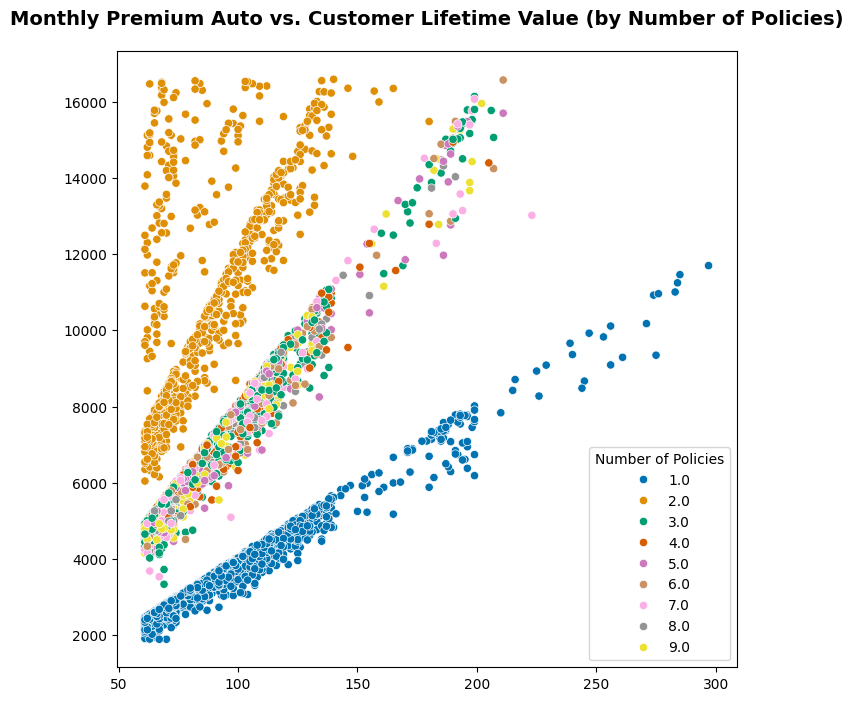

In [182]:
# Customer lifetime Value
plt.figure(figsize = (8,8), facecolor = "white")
sns.scatterplot(data = CLV_new, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "colorblind")

plt.title("Monthly Premium Auto vs. Customer Lifetime Value (by Number of Policies)", weight='bold', size = 14, y=1.03)
plt.xlabel('') 
plt.ylabel('')
plt.show()

### 3.8 *Insight Summary from Explanatory Data Analysis (EDA)*

- Fitur yang kemungkinan besar berkontribusi pada nilai Customer Lifetime Value adalah Number of Policies dan Monthly Premium Auto.
- Fitur Employment Status, Marital Status, dan Education tidak menunjukkan perbedaan median CLV yang signifikan, sehingga kemungkinan pengaruhnya terhadap model relatif kecil.
- Fitur Vehicle Class, Coverage, dan Renew Offer Type memang menunjukkan variasi median, namun perbedaan ini mungkin dipengaruhi oleh Monthly Premium Auto, sehingga dampaknya terhadap model mungkin terbatas.
- Sebagian besar fitur numerik selain Monthly Premium Auto memiliki nilai korelasi yang rendah (di bawah 0,3), yang mengindikasikan kemungkinan pengaruh yang minimal terhadap model.

## 4. Modeling

### 4. *Data Spliting*

Dataset akan dibagi menjadi dua bagian: data train dan data test. Data train digunakan untuk melatih model machine learning, sedangkan data test dipakai untuk mengevaluasi kemampuan model dalam memberikan prediksi yang akurat. Proporsi pembagian data tersebut adalah 70% untuk data train dan 30% untuk data test.

In [183]:
# Define X dan y
X = CLV_new.drop(columns='Customer Lifetime Value') # Feature
y = CLV_new['Customer Lifetime Value'] # Target

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 0)
display(X_train.shape, X_test.shape)

(3221, 10)

(1381, 10)

### 4.2 *Define Encoding*

Data untuk melatih model *machine learning* tidak bisa langsung digunakan karena model hanya menerima input dalam bentuk numerik. Oleh karena itu, data kategorikal perlu diubah menjadi data numerik melalui proses encoding.

- *One-hot encoding* digunakan pada fitur nominal yang memiliki sedikit nilai unik. Contohnya, fitur seperti `Vehicle Class`, `Employment Status`, `Renew Offer Type`, dan `Marital Status` akan dikonversi menjadi beberapa kolom baru dengan nilai 0 dan 1.
- *Ordinal encoding* diterapkan pada fitur ordinal yang memiliki nilai unik dengan urutan atau peringkat tertentu. Fitur seperti `Coverage` dan `Education` akan diubah menjadi angka yang mencerminkan peringkat tersebut.

In [184]:
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

# Menggabungkan encoder dalam column transformer
col_transform = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Employment Status', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping), ['Coverage', 'Education'])
], remainder='passthrough')

col_transform

,transformers,"[('onehot', ...), ('ordinal', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [185]:
# Menguji apakah transformer bisa dijalankan
col_transform.fit_transform(X) # Menguji apakah transformer bisa dijalankan

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.00000000e+01, 5.71479602e+02, 1.18280000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.20000000e+01, 1.14514440e+02, 4.47620000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.20000000e+01, 2.57248789e+02, 2.15140000e+04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.09000000e+02, 5.23200000e+02, 2.77780000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.20000000e+01, 4.47804020e+01, 8.46580000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.99000000e+02, 1.61615740e+02, 6.01840000e+04]])

In [186]:
pd.DataFrame(col_transform.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,90.0,571.479602,11828.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,62.0,114.514440,44762.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,62.0,257.248789,21514.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,116.0,556.800000,17913.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,62.0,355.820799,19030.0


### 4.3 *Define Scaler*

Karena nilai pada fitur-fitur dalam data bervariasi, perlu dilakukan scaling agar semua fitur memiliki skala yang seragam. Pada tahap cross-validation, digunakan RobustScaler sebagai scaler awal karena metode ini lebih tahan terhadap pengaruh outlier. Nantinya, scaler terbaik akan dipilih melalui proses Hyperparameter Tuning.

In [187]:
# Define scaler
robust = RobustScaler()

### 4.4 *Bechmark Model*

*Cross-validation* (CV) yang dibahas pada bagian Benchmarking Model merupakan metode dalam machine learning untuk menentukan model terbaik dari dataset yang tersedia. Dengan menggunakan proses CV, kita dapat memastikan bahwa model yang dipilih memiliki performa baik pada data test dan tidak mengalami overfitting pada data train.

In [188]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0)
gbr = GradientBoostingRegressor(random_state= 0)

lasso = Lasso(alpha = 0.001)
rid = Ridge(alpha = 0.001)

model = [lr, knn, dt, rf, ada, xgb, gbr, lasso, rid]

Pada tahap ini digunakan sembilan metode regresi, yaitu Linear Regression, K-Nearest Neighbors Regressor, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor, XGBoost Regressor, dan Gradient Boosting Regressor. Selanjutnya, akan dilakukan evaluasi untuk menentukan metode mana yang memberikan hasil terbaik.

In [189]:
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# Evaluation Metrics yang digunakan
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

for i in model:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    score_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

Evaluation metrics yang digunakan adalah RMSE, MAE, dan MAPE sebagai metode perhitungan error untuk kasus regresi yang umum digunakan. Dari ketika metrics ini akan dilihat metrics mana yang menghasilkan error paling kecil, dimana semakin kecil error yang dihasilkan, maka semakin baik model yang dibuat.

In [190]:
cvresult_before_tuning = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost', 'Lasso', 'Ridge'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

cvresult_before_tuning

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-2764.679,164.294,-2082.132,88.311,-0.380,0.010
1,KNN,-2746.820,111.056,-1876.383,70.298,-0.344,0.019
2,Decision Tree,-1236.737,54.495,-443.326,25.760,-0.056,0.004
3,Random Forest,-927.836,87.652,-362.320,27.474,-0.044,0.002
4,AdaBoost,-1378.767,82.154,-993.204,76.116,-0.151,0.013
5,XGBoost,-1009.139,79.563,-452.196,28.822,-0.068,0.003
6,Gradient Boost,-885.588,124.247,-382.775,32.570,-0.050,0.002
7,Lasso,-2764.678,164.292,-2082.131,88.309,-0.380,0.010
8,Ridge,-2764.679,164.294,-2082.131,88.310,-0.380,0.010


Dari tabel hasil cross-validation dapat dilihat bahwa nilai RMSE cenderung lebih tinggi karena residual dikuadratkan sebelum dirata-ratakan, sementara residual pada MAE dihitung secara absolut sehingga menghasilkan nilai yang lebih kecil. RMSE juga lebih sensitif terhadap residual yang besar (outlier), sehingga nilai RMSE lebih tinggi menunjukkan adanya error besar pada beberapa prediksi oleh semua algoritma.

- Berdasarkan nilai RMSE, model Gradient Boosting menunjukkan performa terbaik dengan nilai sekitar -885.588.
- Sedangkan berdasarkan nilai MAE dan MAPE, Random Forest menunjukkan hasil paling rendah, yaitu sekitar -362.320 dan -0.044.

Kesimpulannya, model Gradient Boost dan Random Forest sama-sama berpotensi menjadi model terbaik. Namun, langkah selanjutnya adalah melakukan prediksi pada data test menggunakan kedua model tersebut sebagai benchmark.

### 4.5 *Predict to Test Set*

Melakukan prediksi pada *test set* menggunakan `Random Forest dan Gradient Boost`.

In [191]:
# Benchmark 2 model terbaik
test_models = [rf, gbr]

nilai_rmse =[]
nilai_mae =[]
nilai_mape =[]

# Prediksi pada test set
for i in test_models:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Fitting & predict
    pipe_model.fit(X_train, y_train)
    yPred = pipe_model.predict(X_test)

    # Menghitung RMSE, MAE, dan MAPE
    nilai_rmse.append(np.sqrt(mean_squared_error(y_test, yPred)))
    nilai_mae.append(mean_absolute_error(y_test, yPred))
    nilai_mape.append(mean_absolute_percentage_error(y_test, yPred))

In [192]:
score_before_tuning = pd.DataFrame({
    'RMSE': nilai_rmse,
    'MAE': nilai_mae,
    'MAPE': nilai_mape},
    index=['rf', 'gbr']).round(3)

score_before_tuning

,RMSE,MAE,MAPE
rf,970.722,376.452,0.045
gbr,942.598,394.817,0.050


Dari tabel perbandingan hasil prediksi pada *test set*, dapat dilihat bahwa model `Gradient Boost` menunjukkan performa lebih baik dibandingkan `Random Forest`, dengan nilai error RMSE, MAE, dan MAPE yang lebih rendah. Selanjutnya, akan dilakukan proses Hyperparameter Tuning yang akan dibahas pada bagian berikutnya.

### 4.6 *Hyperparameter Tuning*

Model Gradient Boost dipilih sebagai model akhir karena performanya lebih baik dibandingkan Random Forest. Untuk meningkatkan akurasi, akan dilakukan Hyperparameter Tuning guna mencari konfigurasi parameter terbaik yang membuat model lebih optimal dan efisien.

Gradient Boosting adalah metode ensemble learning yang membangun model secara bertahap dengan menggabungkan beberapa decision tree. Proses dimulai dengan prediksi awal (biasanya rata-rata target), lalu menghitung residual (selisih antara nilai asli dan prediksi). Pohon keputusan dibangun untuk memodelkan residual ini dan hasilnya ditambahkan ke prediksi sebelumnya dengan pengaturan learning rate untuk mencegah overfitting. Proses ini diulang hingga perbaikan tidak signifikan atau jumlah pohon maksimal tercapai.

Untuk menemukan parameter terbaik, akan digunakan RandomizedSearchCV untuk eksplorasi awal secara acak, kemudian GridSearchCV untuk pencarian lebih detail di sekitar nilai terbaik dari hasil sebelumnya. Dengan cara ini, diharapkan performa model Gradient Boosting dapat meningkat sehingga menghasilkan prediksi yang lebih akurat dan handal.

**RandomizedSearchCV**

In [193]:
# Define scaler lainnya untuk di tuning mencari scaler terbaik
standard = StandardScaler()
minmax = MinMaxScaler()

# Menggabungkan menjadi 1 list scaler
scaler = [robust, standard, minmax]

In [194]:
# depth of tree
max_depth = list(np.arange(3,10))

# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01]

# number of tree
n_estimators = [100, 200, 300, 400, 500]

# number of train set in each tree (% of total number of train set rows)
subsample = list(np.arange(2,11)/10)

# number of features used for splitting in tree (% of total number of train set columns)
max_features = list(np.arange(1,10)/10)
max_features.append(None)

# Hyperparameter space GBR
hyperparam_space_gbr = {
    'algo__max_depth':max_depth , 
    'algo__learning_rate':learning_rate,
    'algo__n_estimators':n_estimators,
    'algo__subsample':subsample,
    'algo__max_features':max_features,
    'scaler': scaler
}

In [195]:
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', col_transform),
    ('scaler', robust),
    ('algo', gbr)
])

# Hyperparameter tuning dengan RandomizedSearch
random_gbr = RandomizedSearchCV(
    estimator= pipe_gbr,
    param_distributions= hyperparam_space_gbr,
    n_iter= 200,
    cv = 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs= -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa menggunakan 1 scoring yang akan ditampilkan sebagai best score
    random_state= 0
)

In [196]:
random_gbr.fit(X_train, y_train)

,estimator,Pipeline(step...om_state=0))])
,param_distributions,"{'algo__learning_rate': [1, 0.5, ...], 'algo__max_depth': [3, 4, ...], 'algo__max_features': [0.1, 0.2, ...], 'algo__n_estimators': [100, 200, ...], ...}"
,n_iter,200
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,0
,error_score,nan


In [197]:
pd.DataFrame(random_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_algo__subsample,param_algo__n_estimators,param_algo__max_features,param_algo__max_depth,param_algo__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
25,3.226094,0.054799,0.042953,0.003463,RobustScaler(),1.0,200,None,4,0.025,...,36.423933,9,-0.049019,-0.046463,-0.042230,-0.044759,-0.044780,-0.045450,0.002239,9
41,2.909844,0.089275,0.050980,0.008621,RobustScaler(),0.6,400,0.5,3,0.025,...,30.996303,12,-0.050515,-0.048992,-0.046422,-0.047062,-0.049032,-0.048405,0.001478,12
61,1.687389,0.103714,0.040864,0.002851,MinMaxScaler(),0.5,200,0.8,4,0.050,...,36.617914,24,-0.060632,-0.053713,-0.049729,-0.052774,-0.054898,-0.054349,0.003578,31
22,7.674040,0.348364,0.063738,0.013961,MinMaxScaler(),0.9,500,0.9,4,0.025,...,35.829303,15,-0.056265,-0.053061,-0.048230,-0.052548,-0.052827,-0.052586,0.002561,22
50,5.888141,0.392600,0.068582,0.004211,RobustScaler(),0.4,500,None,6,0.010,...,31.954182,1,-0.047579,-0.042632,-0.039887,-0.042895,-0.043616,-0.043322,0.002477,1


In [198]:
print('Gradient Boost (by RandomizedSearchCV')
print('Best_score:', random_gbr.best_score_)
print('Best_params:', random_gbr.best_params_)

Gradient Boost (by RandomizedSearchCV
Best_score: -888.0207352144191
Best_params: {'scaler': RobustScaler(), 'algo__subsample': 1.0, 'algo__n_estimators': 200, 'algo__max_features': None, 'algo__max_depth': 4, 'algo__learning_rate': 0.025}


Setelah melakukan Hyperparameter Tuning dengan metode RandomizedSearch, ditemukan bahwa performa model Gradient Boost mengalami peningkatan dibandingkan sebelum tuning, dengan rincian sebagai berikut:

| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | -885.588 | -382.775 | -0.050 |
| After Tuning (RandomizedSearch) | -888.020 | -364.399 | -0.044 |

Parameter terbaik hasil dari Randomized Search adalah:
- scaler: RobustScaler()
- n_estimators: 200
- max_depth: 4
- learning_rate: 0.025
Langkah selanjutnya adalah melakukan tuning lebih lanjut menggunakan GridSearch dengan harapan dapat meningkatkan performa model lebih baik lagi dibandingkan hasil sebelumnya.

**GridSearchCV**

In [199]:
# depth of tree
max_depth = [3, 4, 7]

# learning rate
learning_rate = [0.1, 0.025, 0.01]

# number of tree
n_estimators = [200, 400, 500]

# number of train set in each tree (% of total number of train set rows)
subsample = [0.4, 0.6, 0.8, 1]

# number of features used for splitting in tree (% of total number of train set columns)
max_features = [0.5, 0.6, None]


# Hyperparameter space GBR
hyperparam_space_gbr = {
    'algo__max_depth':max_depth , 
    'algo__learning_rate':learning_rate,
    'algo__n_estimators':n_estimators,
    'algo__subsample':subsample,
    'algo__max_features':max_features,
}

In [200]:
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', col_transform),
    ('scaler', robust),
    ('algo', gbr)
])

# Hyperparameter tuning dengan GridSearch
grid_gbr = GridSearchCV(
    estimator=pipe_gbr,
    param_grid= hyperparam_space_gbr,
    cv= 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs= -1,                          
    verbose= 1,
)

In [201]:
grid_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,estimator,Pipeline(step...om_state=0))])
,param_grid,"{'algo__learning_rate': [0.1, 0.025, ...], 'algo__max_depth': [3, 4, ...], 'algo__max_features': [0.5, 0.6, ...], 'algo__n_estimators': [200, 400, ...], ...}"
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...), ('ordinal', ...)]"


In [202]:
pd.DataFrame(grid_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__learning_rate,param_algo__max_depth,param_algo__max_features,param_algo__n_estimators,param_algo__subsample,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
127,2.746314,0.350627,0.047368,0.017142,0.025,3,0.6,400,1.0,"{'algo__learning_rate': 0.025, 'algo__max_depth': 3, 'algo__max_features': 0.6, 'algo__n_estimators': 400, 'algo__subsample': 1}",...,32.274217,50,-0.050532,-0.047058,-0.043909,-0.045343,-0.047437,-0.046856,0.002230,52
131,3.536649,0.486292,0.037250,0.002895,0.025,3,0.6,500,1.0,"{'algo__learning_rate': 0.025, 'algo__max_depth': 3, 'algo__max_features': 0.6, 'algo__n_estimators': 500, 'algo__subsample': 1}",...,30.746925,60,-0.051053,-0.048203,-0.045749,-0.047230,-0.048951,-0.048237,0.001769,68
130,3.596356,0.404231,0.043850,0.007483,0.025,3,0.6,500,0.8,"{'algo__learning_rate': 0.025, 'algo__max_depth': 3, 'algo__max_features': 0.6, 'algo__n_estimators': 500, 'algo__subsample': 0.8}",...,31.576649,82,-0.051836,-0.050253,-0.046594,-0.048590,-0.050379,-0.049530,0.001793,87
170,2.196040,0.293354,0.035005,0.006478,0.025,4,None,200,0.8,"{'algo__learning_rate': 0.025, 'algo__max_depth': 4, 'algo__max_features': None, 'algo__n_estimators': 200, 'algo__subsample': 0.8}",...,36.146810,34,-0.048158,-0.045341,-0.042046,-0.043892,-0.043968,-0.044681,0.002030,31
285,5.596360,1.031440,0.046731,0.004692,0.010,4,None,500,0.6,"{'algo__learning_rate': 0.01, 'algo__max_depth': 4, 'algo__max_features': None, 'algo__n_estimators': 500, 'algo__subsample': 0.6}",...,35.879126,37,-0.047858,-0.046254,-0.041438,-0.043888,-0.044365,-0.044760,0.002181,32


In [203]:
print('Gradient Boost (by GridSearchCV')
print('Best_score:', grid_gbr.best_score_)
print('Best_params:', grid_gbr.best_params_)

Gradient Boost (by GridSearchCV
Best_score: -884.3536175245888
Best_params: {'algo__learning_rate': 0.025, 'algo__max_depth': 3, 'algo__max_features': 0.6, 'algo__n_estimators': 400, 'algo__subsample': 1}


Setelah dilakukan tuning menggunakan GridSearch, performa model Gradient Boost mengalami peningkatan kembali dibandingkan dengan hasil sebelumnya:

| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | -885.588 | -382.775 | -0.050 |
| After Tuning (RandomizedSearch) | -888.020 | -364.399 | -0.044 |
| After Tuning (GridSearch) | -884.353 | -364.399 | -0.044 |

Parameter terbaik hasil GridSearch adalah:
- learning_rate: 0.025
- max_depth: 3
- algo__max_features: 0.6
- n_estimators: 400
- subsample: 1
Meskipun parameter GridSearch mirip dengan RandomizedSearch, proses tuning dengan GridSearch berhasil meningkatkan performa model secara lebih optimal.

### 4.7 *Predict to Test Set Using Hyperparameter Tuning*

In [204]:
# Define model terhadap estimator terbaik (via GridSearch)
gbr_tuning = grid_gbr.best_estimator_

# Fitting model
gbr_tuning.fit(X_train, y_train)

# Predict test set
y_pred_gbr_tuning = gbr_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(y_test, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(y_test, y_pred_gbr_tuning)

score_after_tuning_gbr = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning}, index= ['gbr']).round(3)
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,941.033,380.672,0.047


**Performance Comparison**

Perbandingan performa model Gradient Boost sebelum dan sesudah dilakukan hyperparameter tuning.

In [205]:
# Performa model sebelum tuning
score_before_tuning.loc[['gbr']]

,RMSE,MAE,MAPE
gbr,942.598,394.817,0.05


In [206]:
# Performa model setelah tuning
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,941.033,380.672,0.047


Model menunjukkan peningkatan performa setelah dilakukan hyperparameter tuning, ditandai dengan penurunan nilai MAE dan MAPE, meskipun nilai RMSE mengalami kenaikan yang sangat kecil.

- Sebelum tuning, nilai RMSE, MAE, dan MAPE masing-masing adalah 777.481, 363.703, dan 0.049.
- Setelah tuning, nilai RMSE sedikit naik menjadi 778.689, namun MAE dan MAPE turun menjadi 343.016 dan 0.045.

### 4.8 *Hasil Prediksi*

Hasil prediksi dari model Gradient Boost diatas dapat kita evaluasi dengan menggunakan *graphical summary*, yaitu residual plot. Residual plot adalah *scatter plot* antara nilai prediksi pada sumbu x dan residual pada sumbu y. Dengan residual plot ini kita juga dapat melihat seberapa jauh hasil prediksi kita dapat meleset.

In [207]:
# Membuat dataframe berisi data observasi, hasil prediksi, dan residual
CLV_result = CLV_new[['Customer Lifetime Value']].copy()
CLV_result['yPred'] = gbr_tuning.predict(X)
CLV_result['residual'] = CLV_result['Customer Lifetime Value'] - CLV_result['yPred']
CLV_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,10624.282235,-540.795355
1,4943.386117,5105.040444,-161.654327
2,11981.984810,9866.063604,2115.921206
3,4550.856045,4392.484570,158.371475
4,2372.155492,2334.194731,37.960761
...,...,...,...
5663,8114.409136,9027.550110,-913.140974
5664,2442.216651,2555.326922,-113.110271
5665,12904.943360,12915.681603,-10.738243
5666,2447.053134,2477.487362,-30.434228


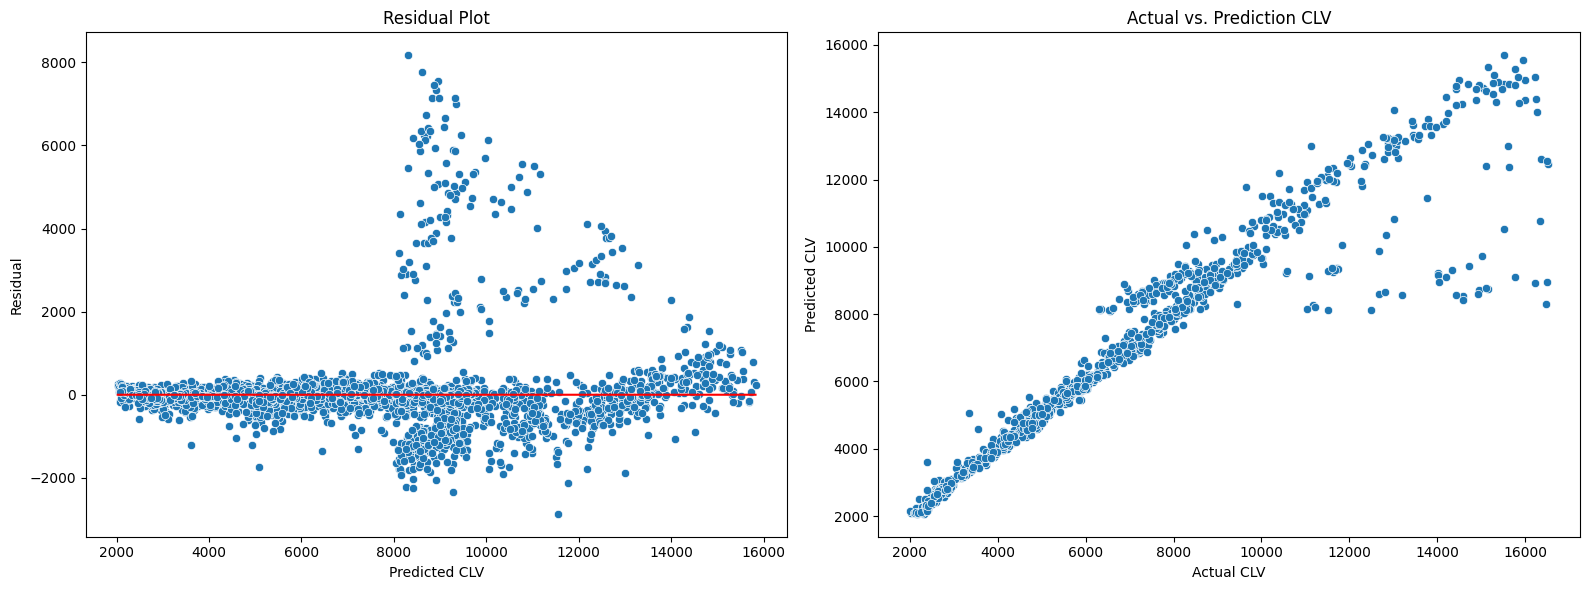

In [208]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=CLV_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=CLV_result, x='yPred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_gbr_tuning).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout();

Plot residual tersebut mengindikasikan bahwa model mampu memprediksi Customer Lifetime Value (CLV) dengan baik untuk nilai CLV di bawah 8000, terlihat dari banyaknya residual yang mendekati nol. Namun, untuk nilai CLV di atas 8000, variansi residual menjadi tidak seragam, dengan beberapa prediksi yang berlebihan (*overprediction*) hingga error sekitar 2000 dan prediksi yang kurang (*underprediction*) mencapai error sekitar 7000. Pada plot *Actual* vs *Predicted CLV*, hasil prediksi juga cukup akurat karena titik-titik data cenderung membentuk garis lurus, meskipun terdapat beberapa outlier terutama pada rentang nilai sekitar ± 9000.

### 4.9 *Important Feature*

Untuk mengidentifikasi fitur-fitur yang paling berpengaruh terhadap prediksi target (Customer Lifetime Value/CLV), kita dapat menggunakan atribut `feature_importances_` yang tersedia pada model. Atribut ini memberikan nilai pentingnya masing-masing fitur dalam proses pembuatan prediksi, sehingga membantu kita memahami variabel mana yang memiliki kontribusi terbesar terhadap hasil model.

In [210]:
# Mengambil nama features dari onehot encoder
f_onehot = col_transform.named_transformers_['onehot'].get_feature_names_out()

# Mengambil nama features dari ordinal encoder
f_ordinal = col_transform.transformers[1][1].cols

# Mengambil nama feature yang ter-passthrough dari ColumnTransformer
f_remain = X_train.loc[:, col_transform.transformers_[2][2]].columns

# Menggabungkan nama-nama feature
all_feat = list(f_onehot) + list(f_ordinal) + list(f_remain)

# Membuat Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : all_feat,
    'imp' : gbr_tuning['algo'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
16,Number of Policies,0.657425
17,Monthly Premium Auto,0.280476
18,Total Claim Amount,0.016857
2,Vehicle Class_SUV,0.013548
14,Coverage,0.009002
19,Income,0.007308
0,Vehicle Class_Luxury Car,0.005656
1,Vehicle Class_Luxury SUV,0.003309
5,Employment Status_Employed,0.002321
8,Employment Status_Unemployed,0.001040


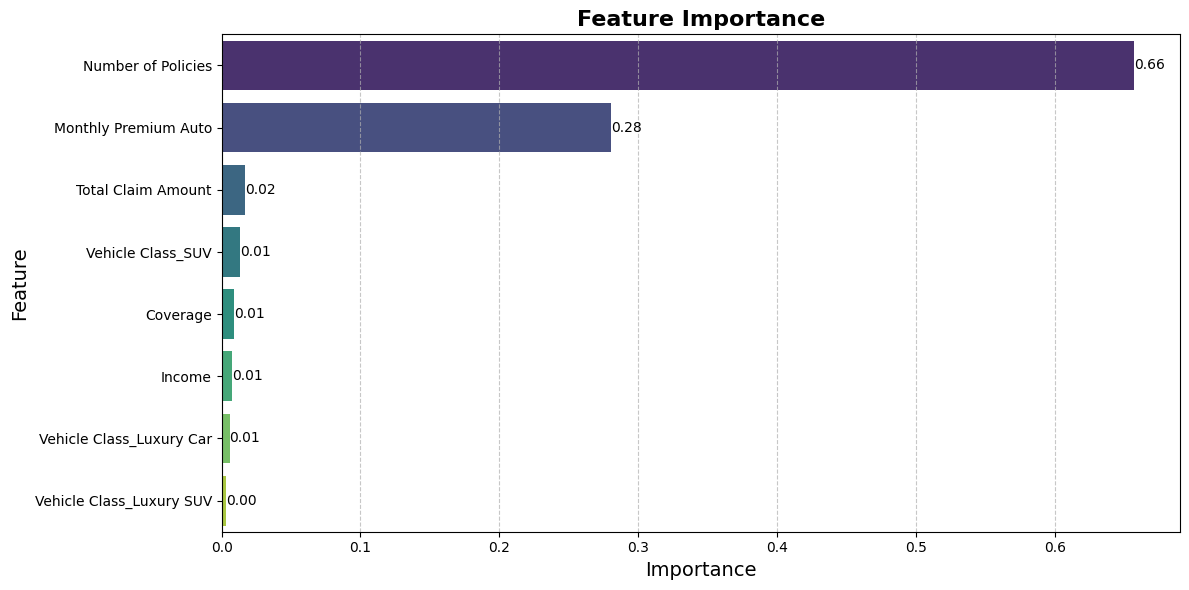

In [211]:
# Bar feature importance
plt.figure(figsize=(12, 6))

# Membuat barplot
ax = sns.barplot(data=feature_imp.head(8), x='imp', y='feature', hue = 'feature', legend = False, palette='viridis')

# Menambahkan judul dan label axis
plt.title('Feature Importance', size=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Menambahkan anotasi di setiap bar
for index, value in enumerate(feature_imp['imp'].head(8)):
    plt.text(value, index, f'{value:.2f}', va='center')

# Menyesuaikan tampilan grid dan layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 5. Kesimpulan

Dalam pemodelan yang dilakukan, fitur `Number of Policies` dan `Monthly Premium Auto` terbukti menjadi faktor utama yang paling berpengaruh terhadap prediksi `Customer Lifetime Value` (CLV). Hubungan positif antara kedua fitur ini dengan CLV menegaskan pentingnya keduanya dalam menentukan nilai CLV nasabah.

Evaluasi model menggunakan metrik RMSE, MAE, dan MAPE menunjukkan performa yang cukup baik, terutama setelah proses hyperparameter tuning. Nilai MAE sekitar 343 menunjukkan bahwa prediksi CLV secara rata-rata memiliki kesalahan ±343 unit dari nilai sebenarnya, sedangkan nilai MAPE sebesar 4.5% mengindikasikan deviasi relatif kecil terhadap nilai aktual. Namun, analisis residual memperlihatkan ketidakseragaman kesalahan prediksi terutama pada nilai CLV yang lebih tinggi (di atas 8000), yang mengindikasikan adanya bias dan potensi kesalahan prediksi lebih besar pada rentang tersebut. Hal ini kemungkinan disebabkan oleh keterbatasan fitur dan data yang kurang representatif.

Sebagai catatan penting, model ini memiliki batasan dalam rentang prediksi yang dapat diandalkan, yaitu:
- Premi bulanan asuransi mobil (`Monthly Premium Auto`) maksimal sekitar $224.42,
- Total klaim (`Total Claim Amount`) maksimal sekitar $1777,
- Prediksi CLV yang dapat diandalkan hanya sampai nilai maksimum sekitar 16,625.

Prediksi di luar rentang tersebut dapat menghasilkan bias yang signifikan dan kurang akurat, sehingga perlu kehati-hatian saat mengaplikasikan model ini pada data baru yang berada di luar batas tersebut.

## 6. Recommendation

**Untuk Pengembangan Model Machine Learning**

1. Lakukan identifikasi terhadap prediksi yang menunjukkan kesalahan besar, baik yang berlebihan (overprediction) maupun kekurangan (underprediction), lalu teliti lebih lanjut fitur-fitur apa saja yang berkontribusi terhadap kesalahan tersebut.
2. Perluas fitur input dengan menambahkan variabel relevan yang berpotensi meningkatkan kemampuan prediksi CLV, seperti durasi keanggotaan asuransi, jenis cakupan polis, lokasi geografis pelanggan, serta faktor lain yang mendukung.
3. Perbanyak jumlah data pelanggan agar model dapat belajar lebih baik dan menghasilkan prediksi yang lebih akurat.
4. Gunakan model yang sudah ada sebagai fondasi untuk eksplorasi metode pembelajaran lain, misalnya pembelajaran tanpa pengawasan (unsupervised learning) dengan teknik clustering untuk mengelompokkan pelanggan berdasarkan nilai profitabilitas, sehingga strategi pemasaran bisa lebih tepat sasaran.

**Untuk Strategi Bisnis**

1. Karena Number of Policies dan Monthly Premium Auto merupakan fitur paling dominan dalam menentukan CLV, disarankan perusahaan membuat penawaran yang lebih personal dan sesuai dengan profil pelanggan berdasarkan jumlah polis dan premi yang mereka bayar. Pendekatan ini membantu mengoptimalkan anggaran pemasaran, menghindari pengeluaran berlebihan pada pelanggan bernilai rendah, dan menjaga loyalitas pelanggan bernilai tinggi.
2. Manfaatkan prediksi CLV dari model machine learning untuk mendorong strategi upselling dan cross-selling. Dengan meningkatkan jumlah polis dan premi, perusahaan dapat secara signifikan meningkatkan nilai hidup pelanggan serta profitabilitas jangka panjang.